텐서플로 허브를 통해 
사전학습된 더 많은 모델을 활용할 수 있다

https://www.tensorflow.org/hub

객체 감지 모델 중 하나인 
Faster R-CNN을 불러와서 테스트해봅시다

https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1

In [1]:
import tensorflow_hub as hub
import tensorflow as tf

In [2]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
detector =  hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [3]:
type(detector)

tensorflow.python.eager.wrap_function.WrappedFunction

In [4]:
from google.colab import drive
drive.mount('/g')

Mounted at /g


In [5]:
import cv2

img = cv2.imread('/g/My Drive/Tensorflow AI/Security-Tips-for-Construction-Site-Theft.jpg')

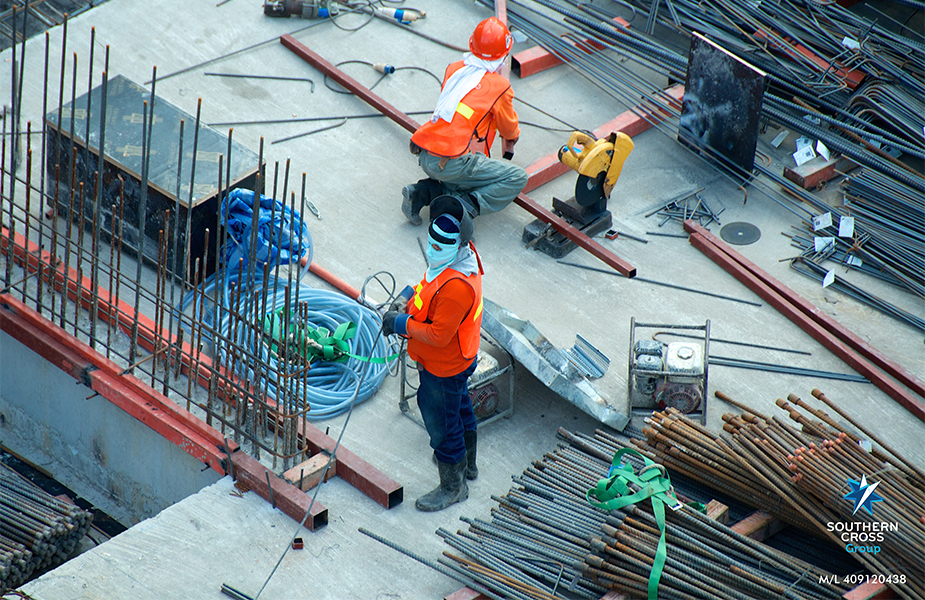

In [6]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [7]:
img2 = img.copy()

In [8]:
img.shape

(600, 925, 3)

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [10]:
img = img/255

In [11]:
img.shape

(600, 925, 3)

In [12]:
img.max()

1.0

In [13]:
img.min()

0.0

In [14]:
img_tf = tf.image.convert_image_dtype(img, tf.float32)

In [15]:
img_tf = tf.expand_dims(img_tf,0)

In [16]:
img_tf.get_shape()

TensorShape([1, 600, 925, 3])

In [ ]:
res = detector(img_tf)

In [ ]:
res

In [ ]:
result = {key:value.numpy() for key,value in res.items()}

In [ ]:
result

In [ ]:
  print("Found %d objects." % len(result["detection_scores"]))

In [ ]:
boxes = result['detection_boxes']


In [ ]:
boxes.shape

바운딩 박스 

[ymin, xmin, ymax, xmax]

x에는 width를 곱하고, y에는 height를 곱해줘야 함

opencv rect

(startX, startY), (endX, endY)

In [ ]:
height, width, channel = img2.shape 

In [ ]:
startX = int(boxes[0][1]* width)
startY = int(boxes[0][0]* height)
endX = int(boxes[0][3]* width)
endY = int(boxes[0][2]* height)

In [ ]:
cv2.rectangle(img2, (startX, startY), (endX, endY), (0, 0, 255), 2)

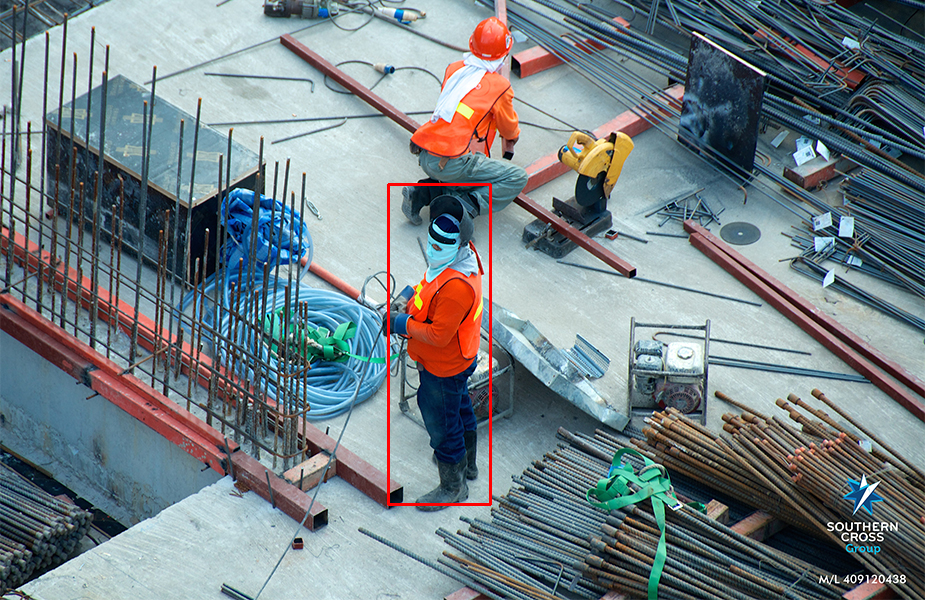

In [ ]:
cv2_imshow(img2)

In [ ]:
# 제목과 확률을 가져와서 찍어봅시다
title = result['detection_class_entities'][0]
prob = round(result['detection_scores'][0] * 100,1)

In [ ]:
title, prob

(b'Person', 76.3)

In [ ]:
img2 = cv2.putText(img2, title.decode() + ' ' + str(prob), (startX, startY-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 1)

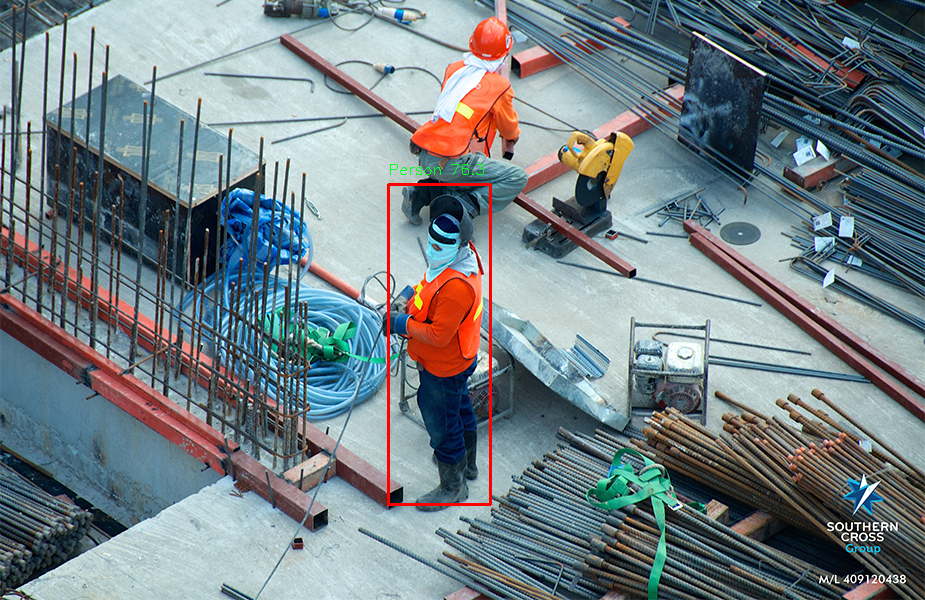

In [ ]:
cv2_imshow(img2)